In [11]:
import pandas as pd

PASTA_DADOS = './dados/'
PASTA_RESULTADO_CADERNO = f'{PASTA_DADOS}outputs/11_graficos_das_metricas/'
ARQUIVO_METRICAS_20 = f'{PASTA_DADOS}outputs/10_compila_todas_metricas/mean_pooling/metricas-k-20.csv'
ARQUIVO_METRICAS_20_1 = f'{PASTA_DADOS}outputs/10_compila_todas_metricas/mean_pooling/metricas-conj-1-k-20.csv'
ARQUIVO_METRICAS_20_2 = f'{PASTA_DADOS}outputs/10_compila_todas_metricas/mean_pooling/metricas-conj-2-k-20.csv'
ARQUIVO_METRICAS_20_3 = f'{PASTA_DADOS}outputs/10_compila_todas_metricas/mean_pooling/metricas-conj-3-k-20.csv'
ARQUIVO_GRAFICO_METRICAS = f'{PASTA_RESULTADO_CADERNO}metricas.png'
ARQUIVO_GRAFICO_METRICAS_PRETO = f'{PASTA_RESULTADO_CADERNO}metricas-preto.png'
ARQUIVO_GRAFICO_METRICAS_POR_GRUPO = f'{PASTA_RESULTADO_CADERNO}metricas-grupo.png'

Modelo: select pertence ao grupo: Situação Atual
Modelo: select_swan pertence ao grupo: Situação Atual
Modelo: select_swan_synonym pertence ao grupo: Situação Atual
Modelo: bert-base-portuguese-cased-finetuned-tcu-acordaos pertence ao grupo: Modelos Baseados em BERT
Modelo: bert-base-portuguese-cased pertence ao grupo: Modelos Baseados em BERT
Modelo: bert-large-portuguese-cased pertence ao grupo: Modelos Baseados em BERT
Modelo: Legal-BERTimbau-sts-large-ma-v3 pertence ao grupo: Modelos Baseados em BERT
Modelo: bert-large-portuguese-cased-legal-mlm-sts-v1.0 pertence ao grupo: Modelos Baseados em BERT
Modelo: bert-large-portuguese-cased-legal-mlm-nli-sts-v1 pertence ao grupo: Modelos Baseados em BERT
Modelo: paraphrase-multilingual-mpnet-base-v2 pertence ao grupo: Modelos Baseados em BERT
Modelo: bm25_padrao pertence ao grupo: BM25 Padrão
Modelo: text-embedding-ada-002 pertence ao grupo: Modelos OpenAI
Modelo: text-embedding-3-small pertence ao grupo: Modelos OpenAI
Modelo: text-embedd

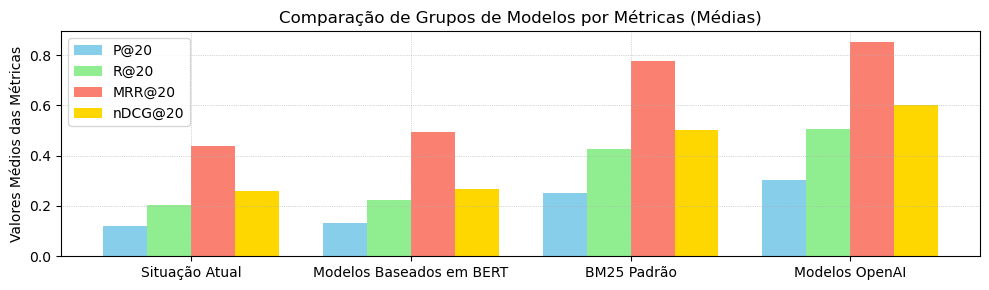

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carrega o arquivo CSV para um DataFrame
df = pd.read_csv(ARQUIVO_METRICAS_20)

# Remove espaços em branco extras dos nomes dos modelos
df['Modelo'] = df['Modelo'].str.strip()

# Definir os grupos de modelos
grupos = {
    'Situação Atual': ['select', 'select_swan', 'select_swan_synonym'],
    'Modelos Baseados em BERT': [
        'bert-base-portuguese-cased-finetuned-tcu-acordaos',
        'bert-base-portuguese-cased', 'bert-large-portuguese-cased',
        'Legal-BERTimbau-sts-large-ma-v3',
        'bert-large-portuguese-cased-legal-mlm-sts-v1.0',
        'bert-large-portuguese-cased-legal-mlm-nli-sts-v1',
        'paraphrase-multilingual-mpnet-base-v2'
    ],
    'BM25 Padrão': ['bm25_padrao'],
    'Modelos OpenAI': ['text-embedding-ada-002', 'text-embedding-3-small', 'text-embedding-3-large']
}

# Lista de métricas e cores correspondentes
metricas = ['P@20', 'R@20', 'MRR@20', 'nDCG@20']
cores = ['skyblue', 'lightgreen', 'salmon', 'gold']

# Cria um DataFrame para armazenar as médias de cada grupo
media_grupos = pd.DataFrame(columns=metricas)

# Calcula a média para cada grupo
for grupo_nome, modelos in grupos.items():
    # Filtra os modelos pertencentes ao grupo
    df_grupo = df[df['Modelo'].isin(modelos)]
    # Verifica se encontrou modelos no grupo, caso contrário exibe um aviso
    if df_grupo.empty:
        print(f"Aviso: Nenhum modelo encontrado para o grupo '{grupo_nome}'. Verifique os nomes.")
    else:
        # Calcula a média das métricas para o grupo
        media_grupos.loc[grupo_nome] = df_grupo[metricas].mean()
        
        # Imprime cada modelo encontrado e seu respectivo grupo
        for modelo in df_grupo['Modelo']:
            print(f"Modelo: {modelo} pertence ao grupo: {grupo_nome}")

# Configurações do gráfico
n_grupos = len(media_grupos.index)
indice = np.arange(n_grupos)  # Posições das barras
largura_barra = 0.2  # Largura de cada grupo de barras

# Cria uma figura e subplots
fig, ax = plt.subplots(figsize=(10, 3))

# Plota as barras para cada métrica
for i, metrica in enumerate(metricas):
    ax.bar(indice + i * largura_barra, media_grupos[metrica], largura_barra, label=metrica, color=cores[i])

# Adiciona os nomes dos grupos no eixo x na horizontal
#ax.set_xlabel('Grupos de Modelos')
ax.set_ylabel('Valores Médios das Métricas')
ax.set_title('Comparação de Grupos de Modelos por Métricas (Médias)')
ax.set_xticks(indice + largura_barra * (len(metricas) - 1) / 2)
ax.set_xticklabels(media_grupos.index, rotation=0)  # Mantém na horizontal

# Adiciona legenda na configuração original
ax.legend()

# Adiciona grid pontilhado
ax.grid(which='both', linestyle=':', linewidth=0.5)

# Ajusta o layout para não cortar as labels
plt.tight_layout()

# Exporta o gráfico para um arquivo PNG
plt.savefig(ARQUIVO_GRAFICO_METRICAS, format='png', dpi=300)  # dpi pode ser ajustado conforme necessário

# Exibe o gráfico
plt.show()


Modelo: select pertence ao grupo: Situação Atual
Modelo: select_swan pertence ao grupo: Situação Atual
Modelo: select_swan_synonym pertence ao grupo: Situação Atual
Modelo: bert-base-portuguese-cased-finetuned-tcu-acordaos pertence ao grupo: Modelos Baseados em BERT
Modelo: bert-base-portuguese-cased pertence ao grupo: Modelos Baseados em BERT
Modelo: bert-large-portuguese-cased pertence ao grupo: Modelos Baseados em BERT
Modelo: Legal-BERTimbau-sts-large-ma-v3 pertence ao grupo: Modelos Baseados em BERT
Modelo: bert-large-portuguese-cased-legal-mlm-sts-v1.0 pertence ao grupo: Modelos Baseados em BERT
Modelo: bert-large-portuguese-cased-legal-mlm-nli-sts-v1 pertence ao grupo: Modelos Baseados em BERT
Modelo: paraphrase-multilingual-mpnet-base-v2 pertence ao grupo: Modelos Baseados em BERT
Modelo: bm25_padrao pertence ao grupo: BM25 Padrão
Modelo: text-embedding-ada-002 pertence ao grupo: Modelos OpenAI
Modelo: text-embedding-3-small pertence ao grupo: Modelos OpenAI
Modelo: text-embedd

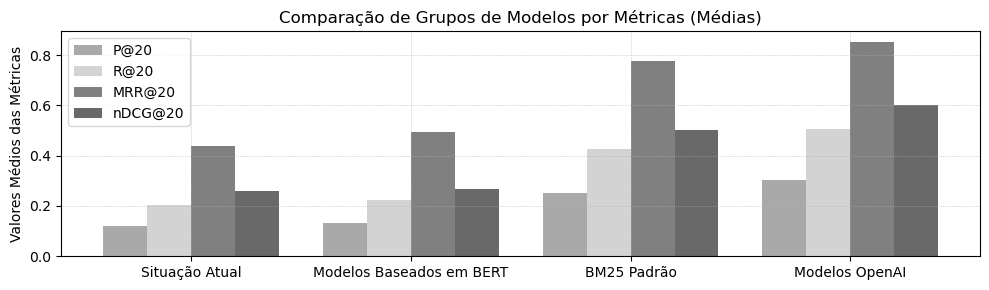

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carrega o arquivo CSV para um DataFrame
df = pd.read_csv(ARQUIVO_METRICAS_20)

# Remove espaços em branco extras dos nomes dos modelos
df['Modelo'] = df['Modelo'].str.strip()

# Definir os grupos de modelos
grupos = {
    'Situação Atual': ['select', 'select_swan', 'select_swan_synonym'],
    'Modelos Baseados em BERT': [
        'bert-base-portuguese-cased-finetuned-tcu-acordaos',
        'bert-base-portuguese-cased', 'bert-large-portuguese-cased',
        'Legal-BERTimbau-sts-large-ma-v3',
        'bert-large-portuguese-cased-legal-mlm-sts-v1.0',
        'bert-large-portuguese-cased-legal-mlm-nli-sts-v1',
        'paraphrase-multilingual-mpnet-base-v2'
    ],
    'BM25 Padrão': ['bm25_padrao'],
    'Modelos OpenAI': ['text-embedding-ada-002', 'text-embedding-3-small', 'text-embedding-3-large']
}

# Lista de métricas e cores correspondentes
metricas = ['P@20', 'R@20', 'MRR@20', 'nDCG@20']

# Variável de controle para barras em preto e branco
usar_preto_e_branco = True

# Cria um DataFrame para armazenar as médias de cada grupo
media_grupos = pd.DataFrame(columns=metricas)

# Calcula a média para cada grupo
for grupo_nome, modelos in grupos.items():
    # Filtra os modelos pertencentes ao grupo
    df_grupo = df[df['Modelo'].isin(modelos)]
    # Verifica se encontrou modelos no grupo, caso contrário exibe um aviso
    if df_grupo.empty:
        print(f"Aviso: Nenhum modelo encontrado para o grupo '{grupo_nome}'. Verifique os nomes.")
    else:
        # Calcula a média das métricas para o grupo
        media_grupos.loc[grupo_nome] = df_grupo[metricas].mean()
        
        # Imprime cada modelo encontrado e seu respectivo grupo
        for modelo in df_grupo['Modelo']:
            print(f"Modelo: {modelo} pertence ao grupo: {grupo_nome}")

# Configurações do gráfico
n_grupos = len(media_grupos.index)
indice = np.arange(n_grupos)  # Posições das barras
largura_barra = 0.2  # Largura de cada grupo de barras

# Cria uma figura e subplots
fig, ax = plt.subplots(figsize=(10, 3))

# Configura cores em preto e branco
if usar_preto_e_branco:
    cores_pb = ['darkgray', 'lightgray', 'gray', 'dimgray']  # Preto, branco e tons de cinza
else:
    cores_pb = ['skyblue', 'lightgreen', 'salmon', 'gold']  # Voltar para as cores

# Plota as barras para cada métrica
for i, metrica in enumerate(metricas):
    ax.bar(indice + i * largura_barra, media_grupos[metrica], largura_barra, label=metrica, color=cores_pb[i])

# Adiciona os nomes dos grupos no eixo x na horizontal
ax.set_ylabel('Valores Médios das Métricas')
ax.set_title('Comparação de Grupos de Modelos por Métricas (Médias)')
ax.set_xticks(indice + largura_barra * (len(metricas) - 1) / 2)
ax.set_xticklabels(media_grupos.index, rotation=0)  # Mantém na horizontal

# Adiciona legenda na configuração original
ax.legend()

# Adiciona grid pontilhado
ax.grid(which='both', linestyle=':', linewidth=0.5)

# Ajusta o layout para não cortar as labels
plt.tight_layout()

# Exporta o gráfico para um arquivo PNG
plt.savefig(ARQUIVO_GRAFICO_METRICAS_PRETO, format='png', dpi=300)  # dpi pode ser ajustado conforme necessário

# Exibe o gráfico
plt.show()


C:\Users\santosr\AppData\Local\Temp\ipykernel_22456\250653765.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selecionados['Modelo'] = pd.Categorical(df_selecionados['Modelo'], categories=modelos_selecionados, ordered=True)


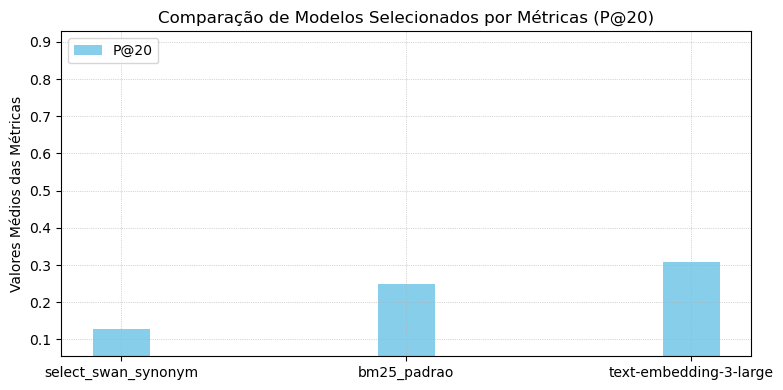

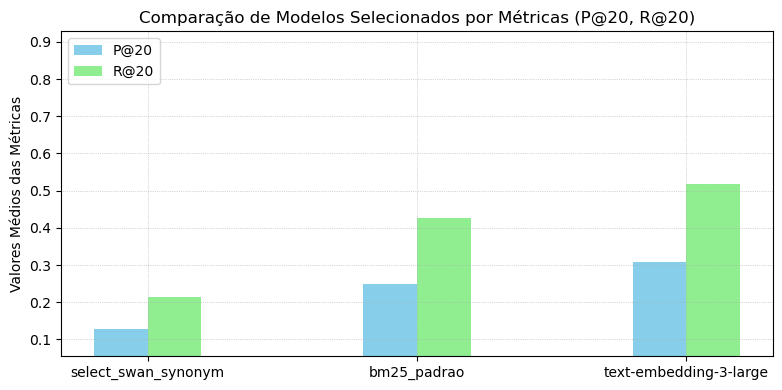

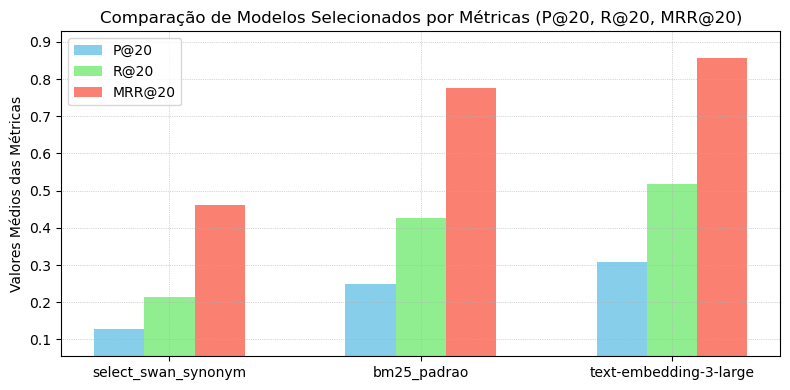

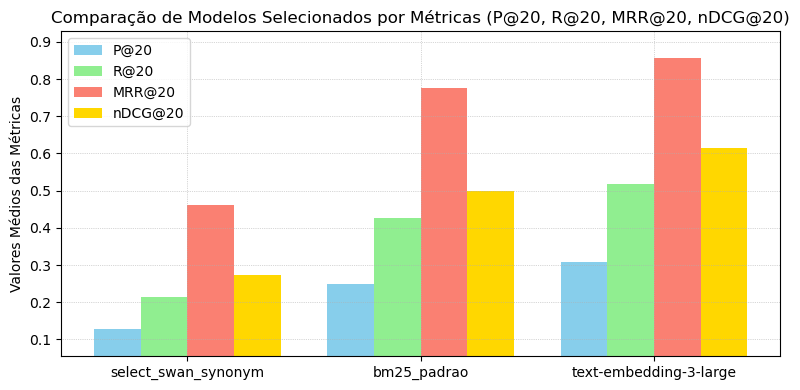

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carrega o arquivo CSV para um DataFrame
df = pd.read_csv(ARQUIVO_METRICAS_20)

# Remove espaços em branco extras dos nomes dos modelos
df['Modelo'] = df['Modelo'].str.strip()

# Define os modelos a serem incluídos no gráfico e a ordem desejada
modelos_selecionados = ['select_swan_synonym', 'bm25_padrao', 'text-embedding-3-large']

# Filtra o DataFrame para conter apenas os modelos selecionados na ordem especificada
df_selecionados = df[df['Modelo'].isin(modelos_selecionados)]

# Ordena os modelos de acordo com a lista desejada
df_selecionados['Modelo'] = pd.Categorical(df_selecionados['Modelo'], categories=modelos_selecionados, ordered=True)
df_selecionados = df_selecionados.sort_values('Modelo')

# Verifica se os modelos foram encontrados
if df_selecionados.empty:
    print("Nenhum dos modelos selecionados foi encontrado. Verifique os nomes.")
else:
    # Lista de combinações de métricas para os gráficos
    combinacoes_metricas = [
        (['P@20'], 'grafico_metricas_01.png'),
        (['P@20', 'R@20'], 'grafico_metricas_02.png'),
        (['P@20', 'R@20', 'MRR@20'], 'grafico_metricas_03.png'),
        (['P@20', 'R@20', 'MRR@20', 'nDCG@20'], 'grafico_metricas_04.png')
    ]

    cores = ['skyblue', 'lightgreen', 'salmon', 'gold']  # Cores para as métricas
    largura_barra = 0.2  # Largura das barras
    indice = np.arange(len(df_selecionados))  # Índices para posicionar os modelos no gráfico

    # Calcula os limites globais do eixo y
    y_min = df_selecionados[[col for comb in combinacoes_metricas for col in comb[0]]].min().min()
    y_max = df_selecionados[[col for comb in combinacoes_metricas for col in comb[0]]].max().max()

    # Adiciona margem ao intervalo (10% do total)
    margem = (y_max - y_min) * 0.1
    y_min -= margem
    y_max += margem

    # Gera um gráfico para cada combinação de métricas
    for metricas, nome_arquivo in combinacoes_metricas:
        # Cria uma figura
        fig, ax = plt.subplots(figsize=(8, 4))

        # Plota as barras para cada métrica
        for i, metrica in enumerate(metricas):
            ax.bar(indice + i * largura_barra, df_selecionados[metrica], largura_barra, label=metrica, color=cores[i])

        # Configurações do gráfico
        ax.set_ylabel('Valores Médios das Métricas')
        ax.set_title(f'Comparação de Modelos Selecionados por Métricas ({", ".join(metricas)})')
        ax.set_xticks(indice + largura_barra * (len(metricas) - 1) / 2)
        ax.set_xticklabels(df_selecionados['Modelo'], rotation=0)  # Nomes dos modelos no eixo x

        # Define a mesma escala no eixo y
        ax.set_ylim(y_min, y_max)

        # Adiciona legenda fixa no canto superior esquerdo
        ax.legend(loc='upper left')

        # Adiciona grid pontilhado
        ax.grid(which='both', linestyle=':', linewidth=0.5)

        # Ajusta o layout para evitar cortes
        plt.tight_layout()

        # Salva o gráfico no arquivo especificado
        plt.savefig(f'{PASTA_RESULTADO_CADERNO}{nome_arquivo}', format='png', dpi=300)

        # Exibe o gráfico (opcional, pode ser removido caso não precise exibir)
        plt.show()


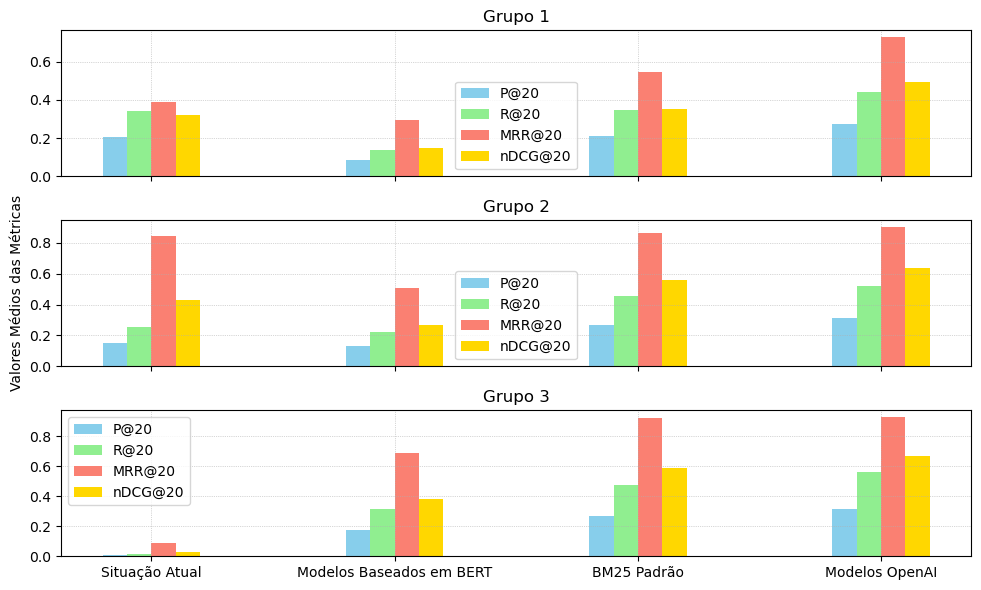

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carrega os arquivos CSV para DataFrames
df1 = pd.read_csv(ARQUIVO_METRICAS_20_1)
df2 = pd.read_csv(ARQUIVO_METRICAS_20_2)
df3 = pd.read_csv(ARQUIVO_METRICAS_20_3)

# Remove espaços em branco extras dos nomes dos modelos
df1['Modelo'] = df1['Modelo'].str.strip()
df2['Modelo'] = df2['Modelo'].str.strip()
df3['Modelo'] = df3['Modelo'].str.strip()

# Definir os grupos de modelos
grupos = {
    'Grupo 1': df1,
    'Grupo 2': df2,
    'Grupo 3': df3,
}

# Lista de métricas e cores correspondentes
metricas = ['P@20', 'R@20', 'MRR@20', 'nDCG@20']
cores = ['skyblue', 'lightgreen', 'salmon', 'gold']

# Configurações do gráfico
n_grupos = len(grupos)
fig, axs = plt.subplots(n_grupos, 1, figsize=(10, 6))  # Ajusta a altura da figura

# Plota as barras para cada grupo
for i, (grupo_nome, df) in enumerate(grupos.items()):
    # Cria um DataFrame para armazenar as médias de cada grupo
    media_grupos = pd.DataFrame(columns=metricas)
    
    # Definir o nome do grupo
    grupo_modelos = {
        'Situação Atual': ['select', 'select_swan', 'select_swan_synonym'],
        'Modelos Baseados em BERT': [
            'bert-base-portuguese-cased-finetuned-tcu-acordaos',
            'bert-base-portuguese-cased', 'bert-large-portuguese-cased',
            'Legal-BERTimbau-sts-large-ma-v3',
            'bert-large-portuguese-cased-legal-mlm-sts-v1.0',
            'bert-large-portuguese-cased-legal-mlm-nli-sts-v1',
            'paraphrase-multilingual-mpnet-base-v2'
        ],
        'BM25 Padrão': ['bm25_padrao'],
        'Modelos OpenAI': ['text-embedding-ada-002', 'text-embedding-3-small', 'text-embedding-3-large']
    }

    # Calcula a média para cada grupo
    for modelo_nome, modelos in grupo_modelos.items():
        # Filtra os modelos pertencentes ao grupo
        df_grupo = df[df['Modelo'].isin(modelos)]
        # Verifica se encontrou modelos no grupo, caso contrário exibe um aviso
        if df_grupo.empty:
            print(f"Aviso: Nenhum modelo encontrado para o grupo '{modelo_nome}' no {grupo_nome}. Verifique os nomes.")
        else:
            # Calcula a média das métricas para o grupo
            media_grupos.loc[modelo_nome] = df_grupo[metricas].mean()
    
    # Plota as barras para cada métrica do grupo atual
    largura_barra = 0.1  # Largura de cada barra
    for j, metrica in enumerate(metricas):
        axs[i].bar(np.arange(len(media_grupos.index)) + j * largura_barra, media_grupos[metrica], width=largura_barra, label=metrica, color=cores[j])

    # Configurações do gráfico atual
    axs[i].set_title(grupo_nome)
    if i == 1:
        axs[i].set_ylabel('Valores Médios das Métricas')
    axs[i].set_xticks(np.arange(len(media_grupos.index)) + largura_barra * (len(metricas) - 1) / 2)

    # Adiciona rótulos apenas no último gráfico
    if i == n_grupos - 1:  # Verifica se é o último gráfico
        axs[i].set_xticklabels(media_grupos.index, rotation=0)  # Nomes dos grupos na horizontal
    else:
        axs[i].set_xticklabels([])  # Remove os rótulos dos eixos x nos gráficos acima

    axs[i].grid(which='both', linestyle=':', linewidth=0.5)
    axs[i].legend()

# Ajusta o layout para não cortar as labels
plt.tight_layout()

# Exporta o gráfico para um arquivo PNG
plt.savefig(ARQUIVO_GRAFICO_METRICAS_POR_GRUPO, format='png', dpi=300)  # dpi pode ser ajustado conforme necessário

# Exibe o gráfico
plt.show()
